In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\krish\AppData\Local\Temp\ipykernel_20840\265554930.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
bank = pd.read_csv('bank-full.csv', sep=';')

In [4]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [7]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

This is a really clean dataset, there are no null values and the data types are correct. Let's start by looking at the distribution of the target variable.

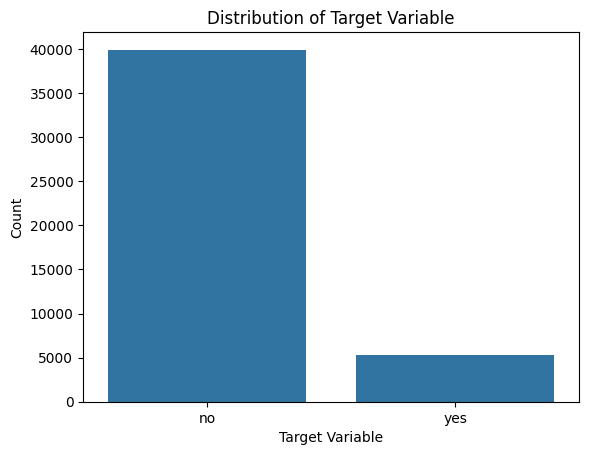

In [8]:
sns.countplot(data=bank, x='y')
plt.xlabel('Target Variable')
plt.ylabel('Count')
plt.title('Distribution of Target Variable')
plt.show()


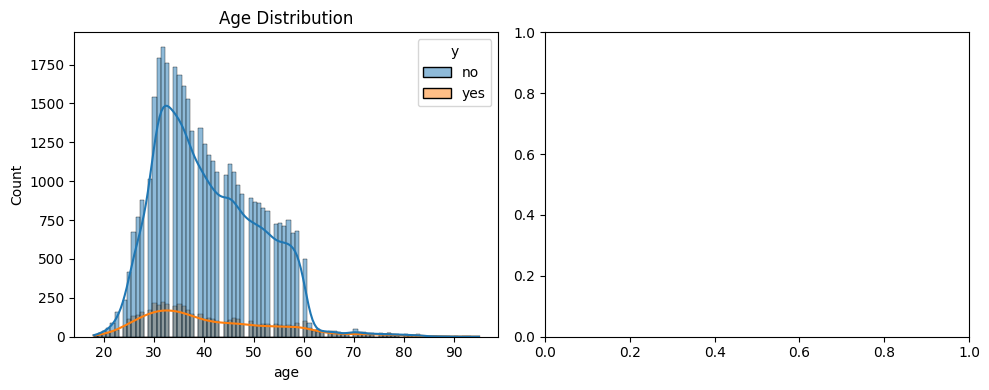

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

sns.histplot(data=bank, x='age', hue='y', kde=True, ax=ax[0])
ax[0].set_title('Age Distribution')

plt.tight_layout()
plt.show()






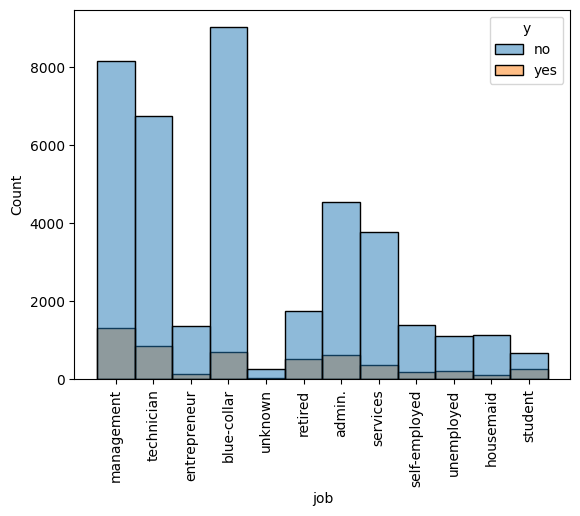

In [12]:
sns.histplot(data=bank, x='job', hue='y') #job distribution
plt.xticks(rotation=90)
plt.show()

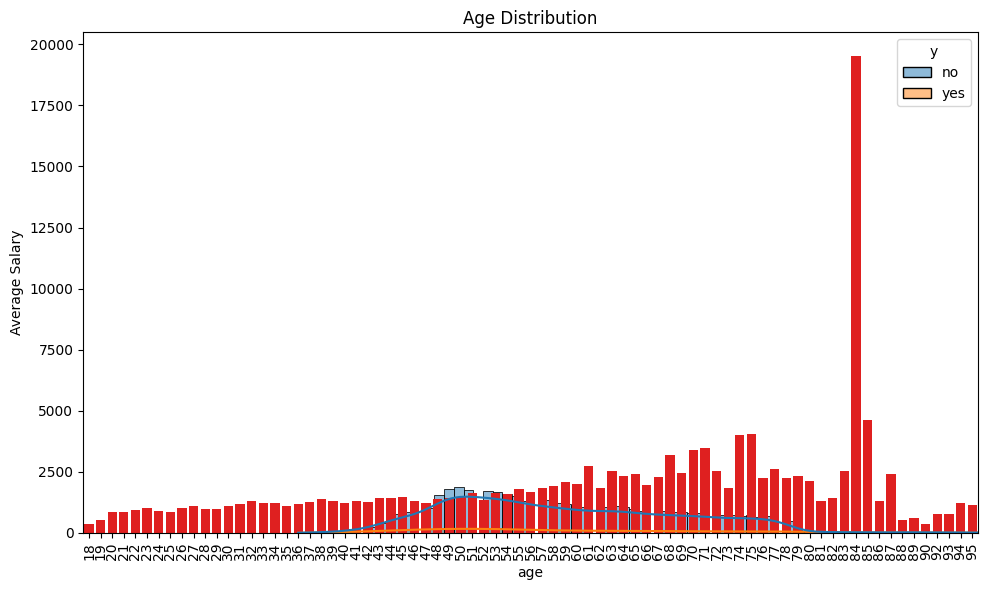

In [13]:
# Calculate average salary by age
average_salary = bank.groupby('age')['balance'].mean().reset_index()

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot age distribution
sns.histplot(data=bank, x='age', hue='y', kde=True, ax=ax)
ax.set_title('Age Distribution')

# Plot average salary
sns.barplot(data=average_salary, x='age', y='balance', color='red', ax=ax)
#add transparency
ax.patches[0].set_alpha(0.2) #set transparency of the bars
ax.set_ylabel('Average Salary')

plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

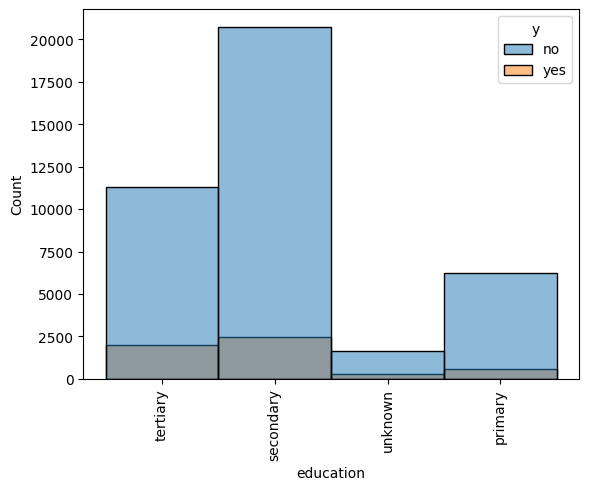

In [14]:
sns.histplot(data=bank, x='education', hue='y') #job distribution
plt.xticks(rotation=90)
plt.show()

In [15]:
#secondary and tertiary education have the highest number of people who subscribed to the term deposit